In [2]:
import numpy as np
import pandas as pd
import numpy.matlib
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler




data=pd.read_csv("/Users/Tara/Downloads/Global_Mobility_Report (1).csv")


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
data.head

<bound method NDFrame.head of         country_region_code        country_region       sub_region_1  \
0                        AE  United Arab Emirates                NaN   
1                        AE  United Arab Emirates                NaN   
2                        AE  United Arab Emirates                NaN   
3                        AE  United Arab Emirates                NaN   
4                        AE  United Arab Emirates                NaN   
...                     ...                   ...                ...   
2356279                  ZW              Zimbabwe  Midlands Province   
2356280                  ZW              Zimbabwe  Midlands Province   
2356281                  ZW              Zimbabwe  Midlands Province   
2356282                  ZW              Zimbabwe  Midlands Province   
2356283                  ZW              Zimbabwe  Midlands Province   

        sub_region_2 metro_area iso_3166_2_code  census_fips_code        date  \
0                NaN    

In [4]:
data=data[data.country_region=="United States"]

In [5]:
data.head

<bound method NDFrame.head of         country_region_code country_region sub_region_1   sub_region_2  \
1794395                  US  United States          NaN            NaN   
1794396                  US  United States          NaN            NaN   
1794397                  US  United States          NaN            NaN   
1794398                  US  United States          NaN            NaN   
1794399                  US  United States          NaN            NaN   
...                     ...            ...          ...            ...   
2332432                  US  United States      Wyoming  Weston County   
2332433                  US  United States      Wyoming  Weston County   
2332434                  US  United States      Wyoming  Weston County   
2332435                  US  United States      Wyoming  Weston County   
2332436                  US  United States      Wyoming  Weston County   

        metro_area iso_3166_2_code  census_fips_code        date  \
1794395      

In [6]:
data=data[data.date.astype(str).str.contains("2020-07")]
data

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
1794532,US,United States,NaN,NaN,NaN,NaN,NaN,2020-07-01,-7.0,4.0,54.0,-27.0,-37.0,10.0
1794533,US,United States,NaN,NaN,NaN,NaN,NaN,2020-07-02,-4.0,11.0,77.0,-24.0,-39.0,10.0
1794534,US,United States,NaN,NaN,NaN,NaN,NaN,2020-07-03,-10.0,11.0,86.0,-30.0,-57.0,14.0
1794535,US,United States,NaN,NaN,NaN,NaN,NaN,2020-07-04,-35.0,-2.0,81.0,-30.0,-28.0,5.0
1794536,US,United States,NaN,NaN,NaN,NaN,NaN,2020-07-05,-22.0,-10.0,53.0,-23.0,-19.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2332407,US,United States,Wyoming,Weston County,NaN,NaN,56045.0,2020-07-27,NaN,NaN,NaN,NaN,-29.0,NaN
2332408,US,United States,Wyoming,Weston County,NaN,NaN,56045.0,2020-07-28,NaN,NaN,NaN,NaN,-24.0,NaN
2332409,US,United States,Wyoming,Weston County,NaN,NaN,56045.0,2020-07-29,NaN,NaN,NaN,NaN,-29.0,NaN
2332410,US,United States,Wyoming,Weston County,NaN,NaN,56045.0,2020-07-30,NaN,NaN,NaN,NaN,-29.0,NaN


In [7]:
data=data[["country_region", "sub_region_1", "date", 'retail_and_recreation_percent_change_from_baseline', 'grocery_and_pharmacy_percent_change_from_baseline', 'transit_stations_percent_change_from_baseline', "workplaces_percent_change_from_baseline", "residential_percent_change_from_baseline"]]

In [8]:
data.head

<bound method NDFrame.head of         country_region sub_region_1        date  \
1794532  United States          NaN  2020-07-01   
1794533  United States          NaN  2020-07-02   
1794534  United States          NaN  2020-07-03   
1794535  United States          NaN  2020-07-04   
1794536  United States          NaN  2020-07-05   
...                ...          ...         ...   
2332407  United States      Wyoming  2020-07-27   
2332408  United States      Wyoming  2020-07-28   
2332409  United States      Wyoming  2020-07-29   
2332410  United States      Wyoming  2020-07-30   
2332411  United States      Wyoming  2020-07-31   

         retail_and_recreation_percent_change_from_baseline  \
1794532                                               -7.0    
1794533                                               -4.0    
1794534                                              -10.0    
1794535                                              -35.0    
1794536                                   

In [9]:
data.dropna(axis=0, how="any", inplace=True)

<ipython-input-9-a41fd17ba840>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(axis=0, how="any", inplace=True)


In [10]:
data.head


<bound method NDFrame.head of         country_region sub_region_1        date  \
1794735  United States      Alabama  2020-07-01   
1794736  United States      Alabama  2020-07-02   
1794737  United States      Alabama  2020-07-03   
1794738  United States      Alabama  2020-07-04   
1794739  United States      Alabama  2020-07-05   
...                ...          ...         ...   
2330767  United States      Wyoming  2020-07-27   
2330768  United States      Wyoming  2020-07-28   
2330769  United States      Wyoming  2020-07-29   
2330770  United States      Wyoming  2020-07-30   
2330771  United States      Wyoming  2020-07-31   

         retail_and_recreation_percent_change_from_baseline  \
1794735                                                4.0    
1794736                                                6.0    
1794737                                               -3.0    
1794738                                              -35.0    
1794739                                   

In [11]:
scaler=StandardScaler()
data[["retail_and_recreation_percent_change_from_baseline", "grocery_and_pharmacy_percent_change_from_baseline", "transit_stations_percent_change_from_baseline", "workplaces_percent_change_from_baseline", "residential_percent_change_from_baseline"]]=scaler.fit_transform(data[["retail_and_recreation_percent_change_from_baseline", "grocery_and_pharmacy_percent_change_from_baseline", "transit_stations_percent_change_from_baseline", "workplaces_percent_change_from_baseline", "residential_percent_change_from_baseline"]]) 

data




<ipython-input-11-a17db85ee869>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[["retail_and_recreation_percent_change_from_baseline", "grocery_and_pharmacy_percent_change_from_baseline", "transit_stations_percent_change_from_baseline", "workplaces_percent_change_from_baseline", "residential_percent_change_from_baseline"]]=scaler.fit_transform(data[["retail_and_recreation_percent_change_from_baseline", "grocery_and_pharmacy_percent_change_from_baseline", "transit_stations_percent_change_from_baseline", "workplaces_percent_change_from_baseline", "residential_percent_change_from_baseline"]])
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/indexing.py:1736: SettingWithCopyWarning: 
A value is trying to

,country_region,sub_region_1,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
1794735,United States,Alabama,2020-07-01,0.877883,0.486546,0.498443,-0.068377,-0.006312
1794736,United States,Alabama,2020-07-02,1.016991,1.222134,0.767890,-0.244561,-0.006312
1794737,United States,Alabama,2020-07-03,0.391004,1.222134,0.305981,-2.094494,1.363591
1794738,United States,Alabama,2020-07-04,-1.834727,-0.249043,-0.040450,0.283991,-0.919581
1794739,United States,Alabama,2020-07-05,-0.652307,-0.821167,0.729397,0.900635,-0.919581
...,...,...,...,...,...,...,...,...
2330767,United States,Wyoming,2020-07-27,0.947437,1.222134,0.998844,0.460175,-0.919581
2330768,United States,Wyoming,2020-07-28,0.738775,0.895206,0.305981,0.548267,-0.691264
2330769,United States,Wyoming,2020-07-29,0.947437,0.568278,0.690905,0.372083,-0.691264
2330770,United States,Wyoming,2020-07-30,1.016991,0.976938,0.806382,0.195899,-0.919581


In [12]:
from sklearn.decomposition import PCA
pca=PCA(n_components=4)
principal_components = pca.fit_transform(data[["retail_and_recreation_percent_change_from_baseline", "grocery_and_pharmacy_percent_change_from_baseline", "transit_stations_percent_change_from_baseline", "workplaces_percent_change_from_baseline", "residential_percent_change_from_baseline"]])
pca_data = pd.DataFrame(data = principal_components, columns = ['PC 1', 'PC 2', "PC 3", "PC 4"])
print(pca.explained_variance_ratio_)
print("0.98260139 of the variance in the data is represented by these 4 principle components")
pca_data



[0.56091676 0.27659068 0.08682532 0.05341374]
0.98260139 of the variance in the data is represented by these 4 principle components


,PC 1,PC 2,PC 3,PC 4
0,-0.820826,0.713125,0.084098,0.266282
1,-1.261607,1.249806,-0.037052,-0.141222
2,0.617683,2.664099,0.160162,-0.669115
3,0.401599,-1.532841,0.080219,-1.285597
4,-0.497584,-1.543884,0.779797,-0.129082
...,...,...,...,...
23686,-2.051527,0.399971,-0.112367,-0.221687
23687,-1.407237,0.124666,-0.471886,-0.004707
23688,-1.477699,0.222958,-0.000015,0.234080
23689,-1.779743,0.455649,-0.135064,-0.022138


In [13]:
# factor loadings are correlations of features and components- trying to find the latent factors

loadings = pd.DataFrame( pca.components_, columns=["retail_and_recreation_percent_change_from_baseline", "grocery_and_pharmacy_percent_change_from_baseline", "transit_stations_percent_change_from_baseline", "workplaces_percent_change_from_baseline", "residential_percent_change_from_baseline"]).T
loadings


,0,1,2,3
retail_and_recreation_percent_change_from_baseline,-0.447612,0.446385,-0.123094,0.763498
grocery_and_pharmacy_percent_change_from_baseline,-0.430646,0.455185,-0.475279,-0.582286
transit_stations_percent_change_from_baseline,-0.485945,0.123014,0.836443,-0.220832
workplaces_percent_change_from_baseline,-0.392767,-0.605108,-0.114695,0.146935
residential_percent_change_from_baseline,0.473053,0.460715,0.214862,0.087498


In [1]:
print("'loadings' are also eigenvectors")
print("Greatest contributors to PC1: residential")
print("Greatest contributors to PC2: residential, retail, grocery")

print("Greatest contributor to PC3: transit")
print("Greatest contributors to PC4: retail")

# https://scentellegher.github.io/machine-learning/2020/01/27/pca-loadings-sklearn.html
# could also do color matrix https://towardsdatascience.com/understand-your-data-with-principle-component-analysis-pca-and-discover-underlying-patterns-d6cadb020939

'loadings' are also eigenvectors
Greatest contributors to PC1: residential
Greatest contributors to PC2: residential, retail, grocery
Greatest contributor to PC3: transit
Greatest contributors to PC4: retail


In [15]:
# # find OPTIMAL value for kmeans
# from sklearn.cluster import KMeans
# data_kmeans = pd.DataFrame(pca_data)
# Sum_of_squared_distances = []
# K = range(1,7)
# for k in K:
#     km = KMeans(n_clusters=k)
#     km = km.fit(pca_data)
#     Sum_of_squared_distances.append(km.inertia_)
# plt.plot(K, Sum_of_squared_distances, 'bx-')
# plt.xlabel('k')
# plt.ylabel('Sum_of_squared_distances')
# plt.title('Elbow Method For Optimal k')
# plt.show()






In [16]:
print(type(data[["retail_and_recreation_percent_change_from_baseline", "grocery_and_pharmacy_percent_change_from_baseline", "transit_stations_percent_change_from_baseline", "workplaces_percent_change_from_baseline", "residential_percent_change_from_baseline"]]))

<class 'pandas.core.frame.DataFrame'>


In [17]:
# run KMeans
kmeans = KMeans(n_clusters=4)
y = kmeans.fit_predict(pca_data[['PC 1', 'PC 2', "PC 3", "PC 4"]])
pca_data['Cluster'] = y
# pca_data["State"]=data["sub_region_1"]
pca_data

,PC 1,PC 2,PC 3,PC 4,Cluster
0,-0.820826,0.713125,0.084098,0.266282,3
1,-1.261607,1.249806,-0.037052,-0.141222,0
2,0.617683,2.664099,0.160162,-0.669115,3
3,0.401599,-1.532841,0.080219,-1.285597,1
4,-0.497584,-1.543884,0.779797,-0.129082,1
...,...,...,...,...,...
23686,-2.051527,0.399971,-0.112367,-0.221687,0
23687,-1.407237,0.124666,-0.471886,-0.004707,0
23688,-1.477699,0.222958,-0.000015,0.234080,0
23689,-1.779743,0.455649,-0.135064,-0.022138,0


In [18]:
ls_to_append=[]
for index, row in data.iterrows():
    ls_to_append.append(row["sub_region_1"])

# ls_to_append


In [19]:
series_to_add_to_pca_data=pd.Series(ls_to_append)
pca_data["State"]=series_to_add_to_pca_data
pca_data


,PC 1,PC 2,PC 3,PC 4,Cluster,State
0,-0.820826,0.713125,0.084098,0.266282,3,Alabama
1,-1.261607,1.249806,-0.037052,-0.141222,0,Alabama
2,0.617683,2.664099,0.160162,-0.669115,3,Alabama
3,0.401599,-1.532841,0.080219,-1.285597,1,Alabama
4,-0.497584,-1.543884,0.779797,-0.129082,1,Alabama
...,...,...,...,...,...,...
23686,-2.051527,0.399971,-0.112367,-0.221687,0,Wyoming
23687,-1.407237,0.124666,-0.471886,-0.004707,0,Wyoming
23688,-1.477699,0.222958,-0.000015,0.234080,0,Wyoming
23689,-1.779743,0.455649,-0.135064,-0.022138,0,Wyoming


In [20]:
pca_data.Cluster.unique()

array([3, 0, 1, 2], dtype=int32)

In [21]:
c0={}
c1={}
c2={}
c3={}
c4={}
list_of_clusters=[c0,c1,c2,c3,c4]
for index, row in pca_data.iterrows():
    for i in range(0,5):
        if row["Cluster"]==i:
            if row["State"] in list_of_clusters[i]:
                list_of_clusters[i][row["State"]]+=1
            else:
                list_of_clusters[i][row["State"]]=1
                
                
print(list_of_clusters)

[{'Alabama': 112, 'Alaska': 52, 'Arizona': 71, 'Arkansas': 84, 'California': 54, 'Colorado': 81, 'Connecticut': 2, 'Delaware': 31, 'Florida': 80, 'Georgia': 87, 'Idaho': 115, 'Illinois': 145, 'Indiana': 374, 'Iowa': 117, 'Kansas': 74, 'Kentucky': 67, 'Louisiana': 54, 'Maine': 83, 'Maryland': 12, 'Massachusetts': 37, 'Michigan': 189, 'Minnesota': 23, 'Mississippi': 31, 'Missouri': 185, 'Montana': 164, 'Nebraska': 87, 'Nevada': 42, 'New Hampshire': 27, 'New Jersey': 39, 'New Mexico': 11, 'New York': 106, 'North Carolina': 96, 'North Dakota': 61, 'Ohio': 422, 'Oklahoma': 164, 'Oregon': 173, 'Pennsylvania': 224, 'Rhode Island': 19, 'South Carolina': 77, 'South Dakota': 86, 'Tennessee': 194, 'Texas': 80, 'Utah': 119, 'Vermont': 4, 'Virginia': 83, 'Washington': 150, 'West Virginia': 54, 'Wisconsin': 154, 'Wyoming': 105}, {'Alabama': 93, 'Alaska': 14, 'Arizona': 51, 'Arkansas': 50, 'California': 251, 'Colorado': 87, 'Connecticut': 51, 'Delaware': 20, 'District of Columbia': 3, 'Florida': 238,

In [22]:
states_clusters={}
for index, row in pca_data.iterrows():
    if row["State"] not in states_clusters:
        state_dict={}
        for i in range(0,5):
            if row["State"] in list_of_clusters[i]:
                state_dict[i]=list_of_clusters[i][row["State"]]
        print(state_dict)
        state_dict_vals=list(state_dict.values())
        state_dict_keys=list(state_dict.keys())
        state_vals_max=max(state_dict_vals)
        max_ind=state_dict_vals.index(state_vals_max)
        max_cluster=state_dict_keys[max_ind]
        states_clusters[row["State"]]=max_cluster
print(states_clusters)
    

{0: 112, 1: 93, 2: 16, 3: 267}
{0: 52, 1: 14, 3: 26}
{0: 71, 1: 51, 2: 152, 3: 81}
{0: 84, 1: 50, 2: 16, 3: 216}
{0: 54, 1: 251, 2: 549, 3: 389}
{0: 81, 1: 87, 2: 102, 3: 151}
{0: 2, 1: 51, 2: 48, 3: 112}
{0: 31, 1: 20, 2: 22, 3: 43}
{1: 3, 2: 28}
{0: 80, 1: 238, 2: 605, 3: 232}
{0: 87, 1: 156, 2: 176, 3: 410}
{1: 2, 2: 143}
{0: 115, 1: 22, 2: 1, 3: 39}
{0: 145, 1: 147, 2: 68, 3: 381}
{0: 374, 1: 108, 2: 27, 3: 299}
{0: 117, 1: 52, 2: 6, 3: 125}
{0: 74, 1: 60, 3: 141}
{0: 67, 1: 57, 2: 14, 3: 291}
{0: 54, 1: 96, 2: 83, 3: 346}
{0: 83, 1: 18, 3: 50}
{0: 12, 1: 82, 2: 197, 3: 98}
{0: 37, 1: 80, 2: 138, 3: 133}
{0: 189, 1: 91, 2: 84, 3: 216}
{0: 23, 1: 61, 2: 59, 3: 177}
{0: 31, 1: 42, 2: 1, 3: 249}
{0: 185, 1: 93, 2: 59, 3: 207}
{0: 164, 1: 16, 3: 6}
{0: 87, 1: 33, 3: 90}
{0: 42, 1: 20, 2: 49, 3: 30}
{0: 27, 1: 24, 3: 92}
{0: 39, 1: 121, 2: 277, 3: 147}
{0: 11, 1: 62, 2: 75, 3: 154}
{0: 106, 1: 187, 2: 317, 3: 348}
{0: 96, 1: 164, 2: 110, 3: 497}
{0: 61, 1: 32, 2: 1, 3: 54}
{0: 422, 1: 1

In [23]:
clusters_and_their_states={1:[], 2:[], 3:[], 4:[], 0:[]}

for i in states_clusters.keys():
    for j in range(0,5):
        if states_clusters[i]==j:
            clusters_and_their_states[j].append(i)


print(clusters_and_their_states)


{1: [], 2: ['Arizona', 'California', 'District of Columbia', 'Florida', 'Hawaii', 'Maryland', 'Massachusetts', 'Nevada', 'New Jersey'], 3: ['Alabama', 'Arkansas', 'Colorado', 'Connecticut', 'Delaware', 'Georgia', 'Illinois', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Nebraska', 'New Hampshire', 'New Mexico', 'New York', 'North Carolina', 'Oklahoma', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'Tennessee', 'Texas', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin'], 4: [], 0: ['Alaska', 'Idaho', 'Indiana', 'Maine', 'Montana', 'North Dakota', 'Ohio', 'Oregon', 'South Dakota', 'Utah', 'Wyoming']}


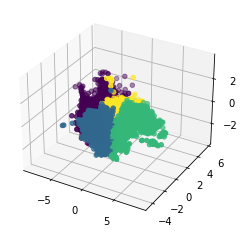

In [24]:
# 4d plot for april kmeans
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = pca_data["PC 1"]
y = pca_data["PC 2"]
z = pca_data["PC 3"]
z = pca_data["PC 4"]

categories = np.unique(pca_data["Cluster"])
colors = np.linspace(0, 1, len(categories))
colordict = dict(zip(categories, colors))  
pca_data["Color"] = pca_data["Cluster"].apply(lambda x: colordict[x])

img=ax.scatter(x,y,z, c=pca_data.Color)


# fig.colorbar(img)
plt.show()


In [25]:
num=0
pca_2=pd.DataFrame(columns=['PC 1', 'PC 2', "PC 3", "PC 4", "Cluster", "State"])
for index, row in pca_data.iterrows():
    if num%15==0:
        pca_2=pca_2.append({"PC 1": row["PC 1"],"PC 2": row["PC 2"],"PC 3": row["PC 3"],"PC 4": row["PC 4"],"Cluster": row["Cluster"],"State": row["State"] }, ignore_index=True)
    num+=1
pca_2.head


<bound method NDFrame.head of           PC 1      PC 2      PC 3      PC 4 Cluster    State
0    -0.820826  0.713125  0.084098  0.266282       3  Alabama
1    -0.192809  0.171376  0.242283 -0.100739       3  Alabama
2     0.005351  0.064978  0.405856  0.185879       3  Alabama
3    -1.895788  0.999090 -0.723363  0.438796       0  Alabama
4    -1.796077  0.730612 -0.856485  0.078101       0  Alabama
...        ...       ...       ...       ...     ...      ...
1575 -1.488246 -0.678402  0.364475  0.276722       0  Wyoming
1576 -2.811503 -1.402574 -0.160289 -0.052638       0  Wyoming
1577 -1.616034  0.535141  0.463260 -0.310619       0  Wyoming
1578 -2.316022 -1.554904 -1.035296 -0.577005       1  Wyoming
1579 -2.864733 -1.292380 -0.351881 -0.126298       0  Wyoming

[1580 rows x 6 columns]>

In [26]:
pca_2

,PC 1,PC 2,PC 3,PC 4,Cluster,State
0,-0.820826,0.713125,0.084098,0.266282,3,Alabama
1,-0.192809,0.171376,0.242283,-0.100739,3,Alabama
2,0.005351,0.064978,0.405856,0.185879,3,Alabama
3,-1.895788,0.999090,-0.723363,0.438796,0,Alabama
4,-1.796077,0.730612,-0.856485,0.078101,0,Alabama
...,...,...,...,...,...,...
1575,-1.488246,-0.678402,0.364475,0.276722,0,Wyoming
1576,-2.811503,-1.402574,-0.160289,-0.052638,0,Wyoming
1577,-1.616034,0.535141,0.463260,-0.310619,0,Wyoming
1578,-2.316022,-1.554904,-1.035296,-0.577005,1,Wyoming


In [27]:
clusters_and_their_states.values()

dict_values([[], ['Arizona', 'California', 'District of Columbia', 'Florida', 'Hawaii', 'Maryland', 'Massachusetts', 'Nevada', 'New Jersey'], ['Alabama', 'Arkansas', 'Colorado', 'Connecticut', 'Delaware', 'Georgia', 'Illinois', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Nebraska', 'New Hampshire', 'New Mexico', 'New York', 'North Carolina', 'Oklahoma', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'Tennessee', 'Texas', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin'], [], ['Alaska', 'Idaho', 'Indiana', 'Maine', 'Montana', 'North Dakota', 'Ohio', 'Oregon', 'South Dakota', 'Utah', 'Wyoming']])

In [28]:
# vals=list(clusters_and_their_states.values())
# keys=list(clusters_and_their_states.keys())
# for index, row in pca_2.iterrows():
#     for i in range(len(vals)):
#         if row["State"] in vals[i]:
#             pca_2.at[index, "Cluster"]= keys[i]
# pca_2
            
            
    

In [29]:
# 5d plot for  kmeans




import plotly
import plotly.graph_objs as go

#Set marker properties
markercolor = pca_2["Cluster"]
markersize = (pca_2['PC 4']+6)*2

#Make Plotly figure
fig1 = go.Scatter3d(x=pca_2["PC 1"],
                    y=pca_2["PC 2"],
                    z=pca_2["PC 3"],
                    marker=dict(size=markersize,
                                color=markercolor,
                                opacity=0.9,
                                reversescale=True,colorscale='Rainbow'),
                    line=dict (width=0.02),
                    mode='markers')

#Make Plot.ly Layout
mylayout = go.Layout(scene=dict(xaxis=dict( title="Principal Component 1"),
                                yaxis=dict( title="Principal Component 2"),
                                zaxis=dict(title="Principal Component 3")),
                    )

#Plot and save html
plotly.offline.plot({"data": [fig1],
                     "layout": mylayout},
                     auto_open=True, filename=("JULY Mobility KMeans.html")
                   )


'JULY Mobility KMeans.html'